In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# importing the images
# loading the image as a grayscale image
img0C = cv2.imread('testImages/C3.PNG')  # '/content/drive/MyDrive/Colab Notebooks/CO543/PROJECT/inputImages/H1.PNG'
img1C = cv2.imread('testImages/H2.PNG')
img2C = cv2.imread('testImages/H3.PNG')

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
# ax1.set_title('Image 0')
# ax1.imshow(img0C, cmap='jet')
# ax2.set_title('Image 1')
# ax2.imshow(img1C, cmap='jet')
# ax3.set_title('Image 2')
# ax3.imshow(img2C, cmap='jet')
print(img0C.shape)
print(img1C.shape)
print(img2C.shape)

(26, 41, 3)
(16, 48, 3)
(58, 81, 3)


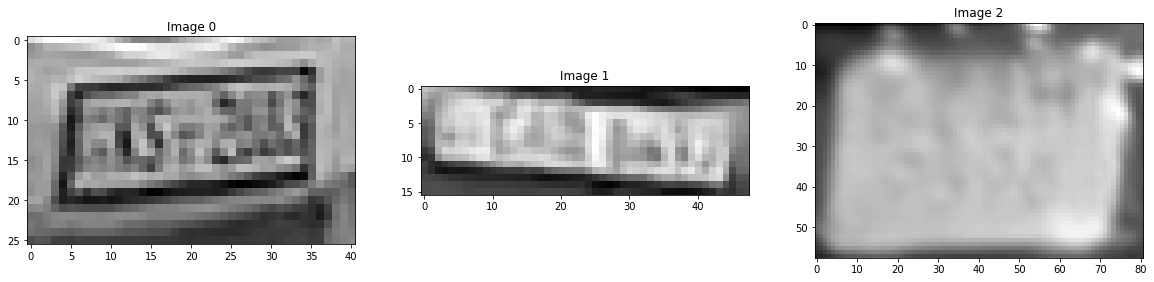

In [13]:
img0G = cv2.cvtColor(img0C, cv2.COLOR_BGR2GRAY)
img1G = cv2.cvtColor(img1C, cv2.COLOR_BGR2GRAY)
img2G = cv2.cvtColor(img2C, cv2.COLOR_BGR2GRAY)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('Image 0')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Image 1')
ax2.imshow(img1G, cmap='gray')
ax3.set_title('Image 2')
ax3.imshow(img2G, cmap='gray')

Resizing the image

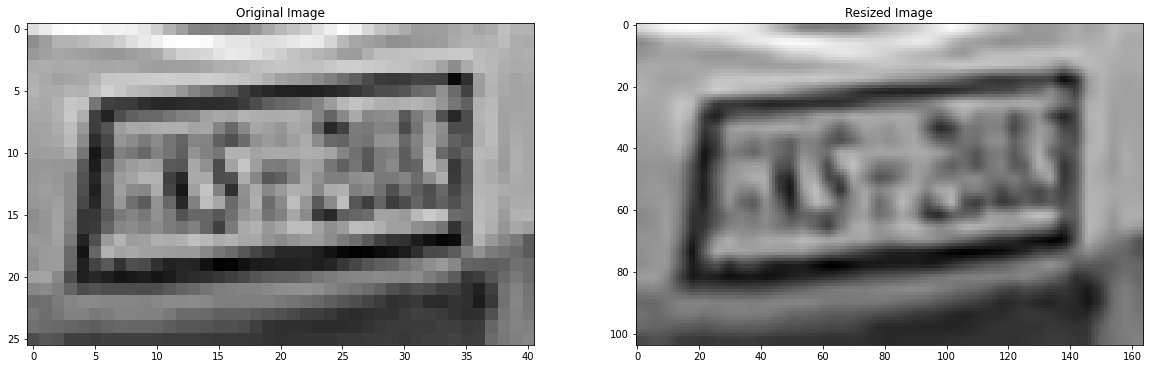

In [14]:
# Resized image
img0G_resized = cv2.resize(img0G,dsize=None,fx=4,fy=4)
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original Image')
ax1.imshow(img0G, cmap='gray')
ax2.set_title('Resized Image')
ax2.imshow(img0G_resized, cmap='gray')

### Trying a first order filter

Manually defining a kernel

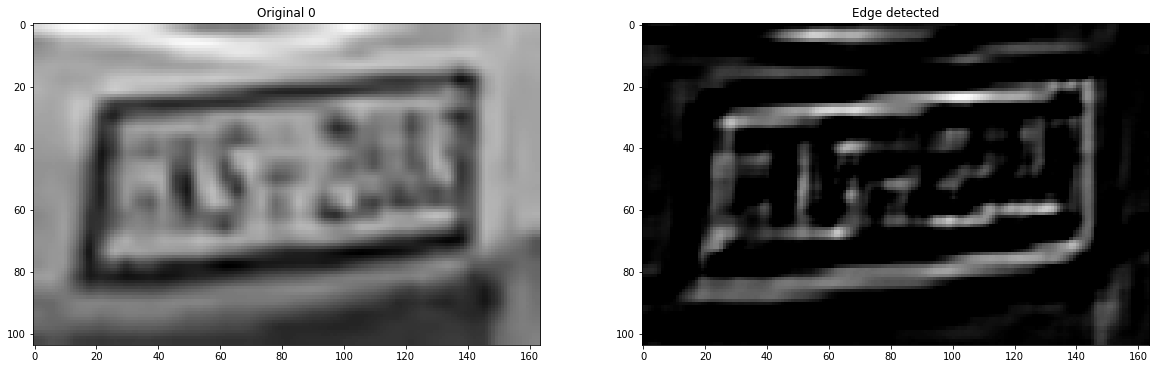

In [15]:
# Creating the kernel(2d convolution matrix)
kernel2 = np.array([[-2, -1, 0],
                    [0, 0, 0],
                    [0, 1, 2]])
  
# Applying the filter2D() function
img1 = cv2.filter2D(src=img0G_resized, ddepth=-1, kernel=kernel2)
# img1 = abs(img1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original 0')
ax1.imshow(img0G_resized, cmap='gray')
ax2.set_title('Edge detected')
ax2.imshow(img1, cmap='gray')
# # Shoeing the original and output image
# cv2.imshow('Original', img0G_resized)
# cv2.imshow('Kernel Blur', img)
  
# cv2.waitKey()
# cv2.destroyAllWindows()

Sobel filter

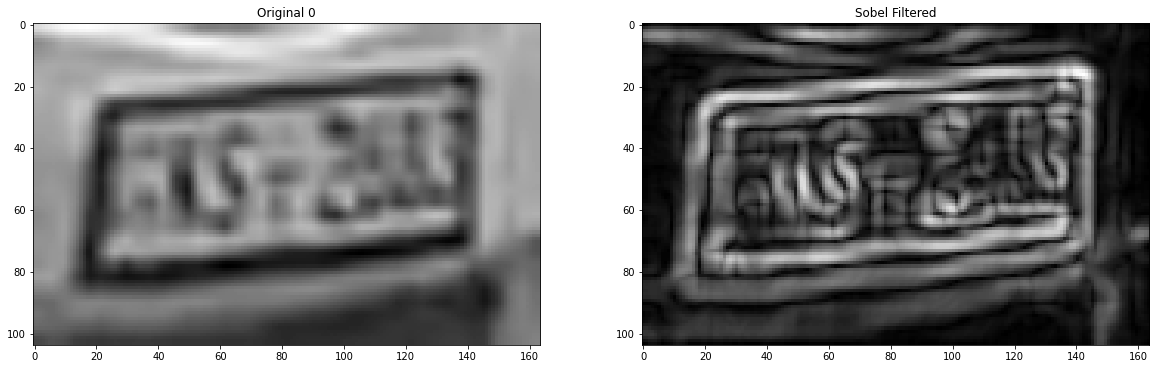

In [16]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

# removing noise before applying the filter
gray = cv2.GaussianBlur(img0G_resized, (3, 3), 0)
# gray =  img0G_resized

# gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, .5, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original 0')
ax1.imshow(img0G_resized, cmap='gray')
ax2.set_title('Sobel Filtered')
ax2.imshow(grad, cmap='gray')

Trying the laplacian filter and checking for 0 crossings

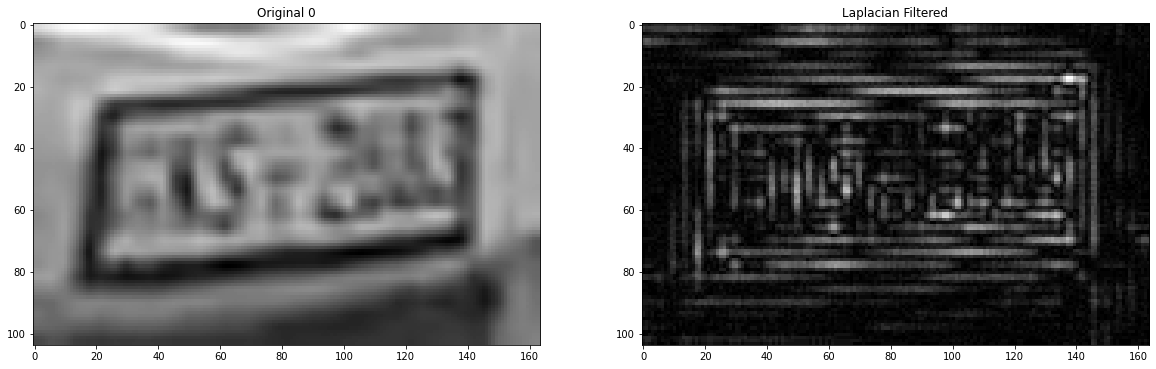

In [17]:
ddepth = cv2.CV_16S
kernel_size = 3
window_name = "Laplace Demo"


# Remove noise by blurring with a Gaussian filter
src = cv2.GaussianBlur(img0G_resized, (3, 3), 0)
# [reduce_noise]

# [laplacian]
# Apply Laplace function
dst = cv2.Laplacian(src, ddepth, ksize=kernel_size)
# [laplacian]
# [convert]
# converting back to uint8
abs_dst = cv2.convertScaleAbs(dst)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original 0')
ax1.imshow(img0G_resized, cmap='gray')
ax2.set_title('Laplacian Filtered')
ax2.imshow(abs_dst, cmap='gray')

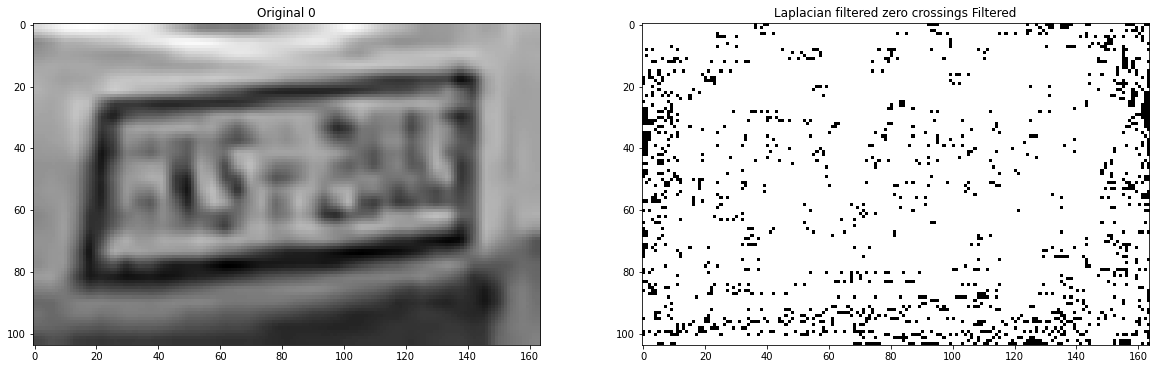

In [18]:
t1 = -1 #@param {type:"slider", min:0, max:255, step:1 }
t2 = 1 #@param {type:"slider", min:0, max:255, step:1 }

# function to perfomr the image thresholding
# in_img = an grayscale image read using cv2.imread()
# thresh_val = the threshold value such that 0 < thresh_val <= 255
def threshold(in_img, thresh_val1, thresh_val2):
  rows, cols = in_img.shape[:2]  # getting the height(number of rows) and the width(number of columns) of the original image

  out_img = np.zeros([rows, cols])
  for r in range(rows):
    for c in range(cols):
      if in_img[r, c] > thresh_val1 and in_img[r, c] < thresh_val2:
        out_img[r, c] = np.uint8(0) 
      else:
        out_img[r, c] = np.uint8(255) 

  return out_img

thresh_img = threshold(dst, t1, t2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original 0')
ax1.imshow(img0G_resized, cmap='gray')
ax2.set_title('Laplacian filtered zero crossings Filtered')
ax2.imshow(thresh_img, cmap='gray')

### Using the Canny edge detection algorithm

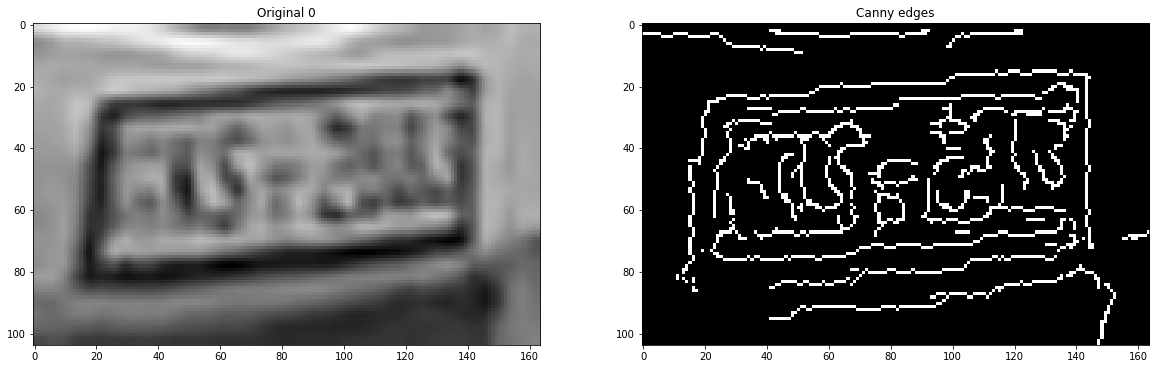

In [26]:
edges = cv2.Canny(image=img0G_resized, threshold1=50, threshold2=125)

 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.set_title('Original 0')
ax1.imshow(img0G_resized, cmap='gray')
ax2.set_title('Canny edges')
ax2.imshow(edges, cmap='gray')

Hough line detection

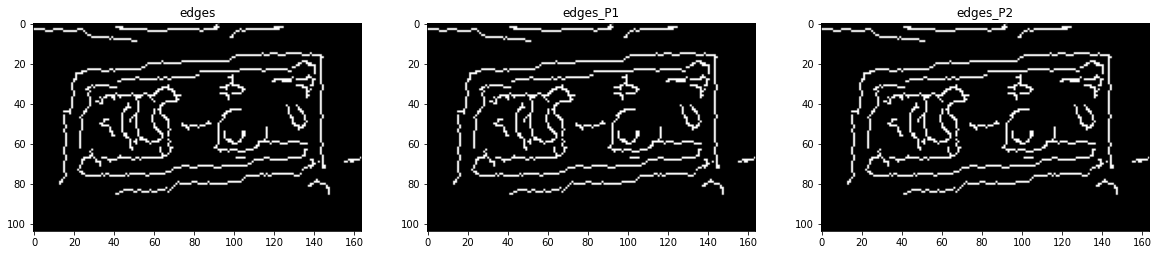

In [20]:
import math

# Copy edges to the images that will display the results in BGR
# cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

edges_P1 = np.copy(edges)
edges_P2 = np.copy(edges)


lines = cv2.HoughLines(edges, 1, np.pi/4, 250, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(edges_P1, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(edges_P2, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('edges')
ax1.imshow(edges, cmap='gray')
ax2.set_title('edges_P1')
ax2.imshow(edges_P1, cmap='gray')
ax3.set_title('edges_P2')
ax3.imshow(edges_P2, cmap='gray')